In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools

# pretraitement
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re

# models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('data/data_2.csv')
data.head()

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign


In [10]:
data.isnull().sum()
#we can see we don t have null values

Domain    0
Family    0
dtype: int64

In [11]:
np.unique(data['Family'])

array(['banjori', 'benign', 'emotet', 'flubot', 'gameover', 'locky',
       'murofet', 'mydoom', 'necro', 'necurs', 'ngioweb', 'pykspa_v1',
       'qadars', 'qakbot', 'ramnit', 'ranbyus', 'rovnix', 'shifu',
       'shiotob', 'simda', 'suppobox', 'symmi', 'tinba', 'virut'],
      dtype=object)

In [12]:
# splitting url into 2 parts :
# ===============================

# for the second part : (expl : "plus.google.com")
# we split the domain using split method that returns a list of strings (["plus", "google", "com"])
# we take the last part ("com")
data['part2'] = data["Domain"].apply(lambda x: x.split(".")[-1]) 

# for the fist part : (expl : "plus.google.com")
# we split the domain using split method that returns a list of strings (["plus", "google", "com"])
# we take all strings except for the last one (the list become ["plus", "google"])
# we join the strings using the char "_" 
data['part1'] = data["Domain"].apply(lambda x: "_".join(x.split(".")[:-1])) # google, youtuube, plus_google

In [13]:
data.head()

,Domain,Family,part2,part1
0,google.com,benign,com,google
1,facebook.com,benign,com,facebook
2,youtube.com,benign,com,youtube
3,twitter.com,benign,com,twitter
4,instagram.com,benign,com,instagram


In [14]:
np.unique(data['part2'])

array(['ac', 'at', 'au', 'be', 'bit', 'biz', 'br', 'bz', 'ca', 'cc', 'ch',
       'click', 'cm', 'cn', 'co', 'com', 'cx', 'de', 'dev', 'edu', 'ee',
       'es', 'eu', 'fm', 'fr', 'ga', 'gd', 'gg', 'gl', 'gle', 'google',
       'gov', 'id', 'im', 'in', 'info', 'int', 'io', 'ir', 'it', 'jp',
       'ki', 'kr', 'kz', 'la', 'ly', 'me', 'mil', 'mn', 'mp', 'ms', 'mu',
       'mx', 'name', 'net', 'nf', 'nl', 'nu', 'nz', 'org', 'page', 'ph',
       'pl', 'pm', 'pro', 'pw', 'ru', 'sc', 'se', 'sh', 'site', 'so',
       'su', 'sx', 'tf', 'th', 'tj', 'to', 'top', 'tv', 'tw', 'ua', 'ug',
       'uk', 'us', 'va', 'watch', 'work', 'ws', 'xxx', 'xyz', 'yt'],
      dtype=object)

In [15]:
new_df = pd.DataFrame() # create new df for the training 

# some initialisations
vowels = ['u','i', 'e', 'a', 'o']
digits = ['1', '2', '3', '4','5', '6', '7', '8', '9', '0']
le = LabelEncoder()

# vow1 : number of vowels in part1
# len1 : length of part 1
# num_degits : number of digits in part1
# num_special_caractere : number of _ 
# len2: length of part 2

new_df['vow1'] = data['part1'].apply(lambda x : functools.reduce(lambda a, b: a+1 if b in vowels else a, x, 0))
new_df ['num_digits']= data['part1'].apply(lambda x: functools.reduce(lambda a, b: a+1 if b in digits else a, x, 0))
new_df ['num_special_chars']= data['part1'].apply(lambda x: functools.reduce(lambda a, b: a+1 if b == "_" else a, x, 0))
new_df['len1'] = data['part1'].apply(lambda x : len(x))
new_df['len2'] = data["part2"].apply(lambda x : len(x))

# part2_encoded :encoding categorical values of part2
le.fit(data['part2'])
new_df["part2_encoded"] = le.transform(data['part2'])

# encoding the variable family 
le.fit(data['Family'])
new_df ["family"] = le.transform(data['Family'])

new_df.head()

,vow1,num_digits,num_special_chars,len1,len2,part2_encoded,family
0,3,0,0,6,3,15,1
1,4,0,0,8,3,15,1
2,4,0,0,7,3,15,1
3,2,0,0,7,3,15,1
4,3,0,0,9,3,15,1


<AxesSubplot:>

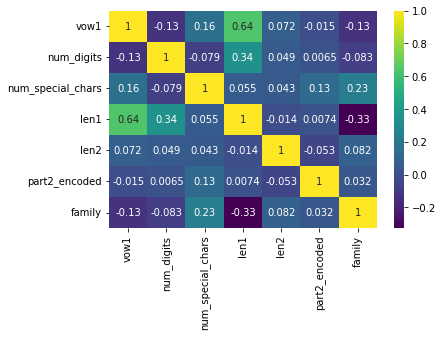

In [16]:
sns.heatmap(new_df.corr(),annot=True, cmap = 'viridis')
# our variables are not strongly correalted 
# we have only a strong correlation between number of vowels and the lenghth of the first part
# our variables are ready for classif

<AxesSubplot:xlabel='count', ylabel='Family'>

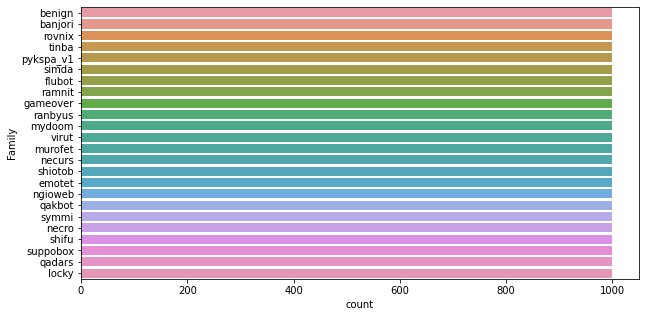

In [17]:
plt.figure(figsize = (10, 5))
sns.countplot(y="Family", data=data, saturation=0.7)
# we can see we have a balance data set == we have the same number of instence in each class
# we don t need cross validation

---
# Scaling and splitting data
---

In [18]:
scaler = StandardScaler()
X = new_df[['vow1','num_digits', 'num_special_chars','len1', 'len2', 'part2_encoded']]
X_scaled = scaler.fit_transform(X)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, new_df['family'], test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16800, 6), (16800,), (7200, 6), (7200,))

---
# Starting classification with different classifiers
---

c:\Users\HP PAVILION 14\Desktop\malika\kaggle\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


accuracy:  0.8579166666666667


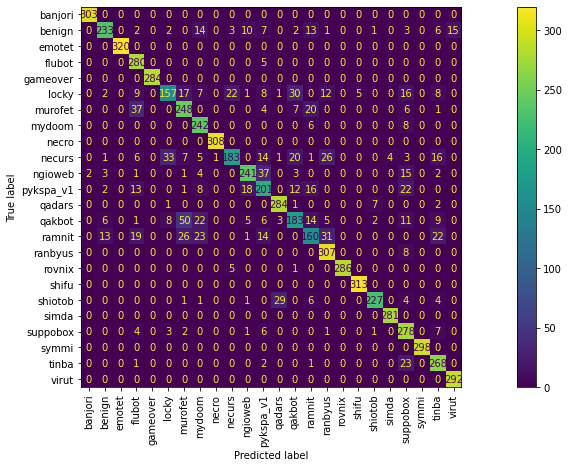

In [20]:
# neural network
clf = MLPClassifier(random_state=42, max_iter = 300) # verbose = true to visualise the trining score
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy: ",accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)


accuracy :  0.755


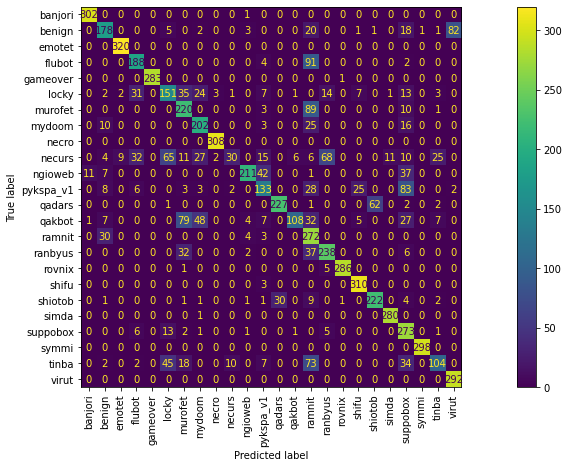

In [21]:
# SVM support vector machine 
clf = SVC()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy : ",accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)

accuracy :  0.8751388888888889


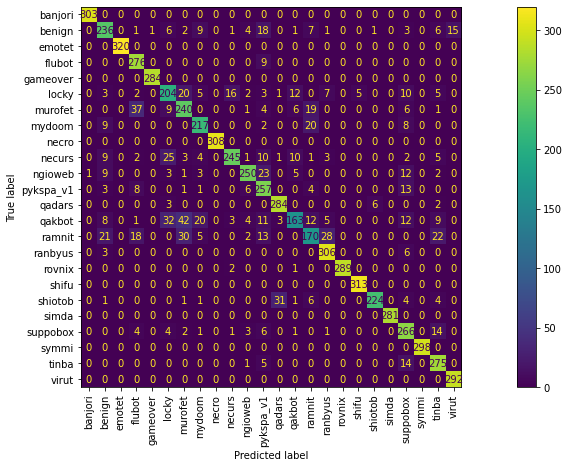

In [22]:
# decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy : ",accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)

accuracy :  0.8740277777777777


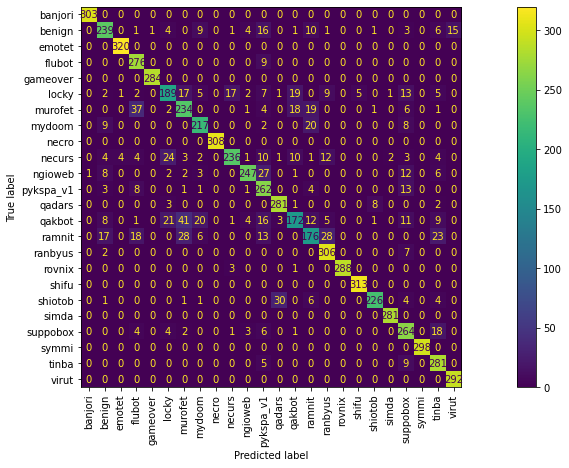

In [23]:
# random forest :
clf = RandomForestClassifier(max_depth= 100, random_state= 42)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy : ",accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)


accuracy :  0.5994444444444444


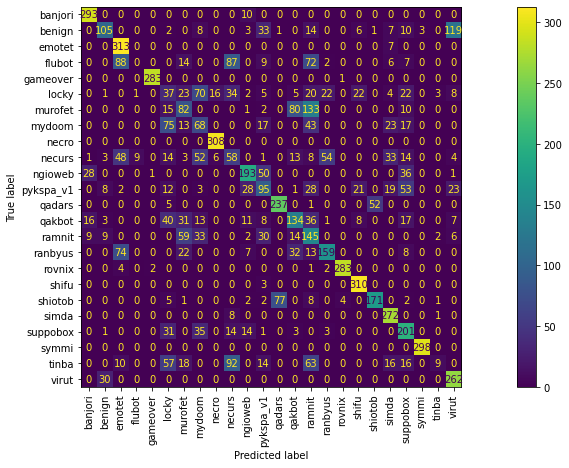

In [24]:
# Logistic regression
clf = LogisticRegression(random_state= 42, max_iter = 1000)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy : ",accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)

---
---
## variables :

| variable | is categorical |
| --- | --- |
| vow1 | false |
| len1 | false |
| len2 | false |
| num_digits | false |
| num_special_chars | false |
| part2_encoded | true |

---
---

## evaluation :

| model | accuracy |
| --- | --- |
| Logistic Regression | 0.595972 |
| Random Forest | 0.869861 |
| NEURAL NETWORK | 0.856111 |
| SVM | 0.754583|
| Decision Tree| 0.87125 |

---
---

## sorting models by performence :
decision tree --> Random forest --> Neural Network --> SVM --> Logistic regression

---
---

## comparision:
### Decision tree , Random forest and Neural Network :
- had almost the same results 
- they had the best results predicting all the classes
### SVM 
- it wasn t bad
- their was some classes where it gave some bad results 
    - necurus 32/ 300
    - tinba 95/ 300
    - Qakbot 101/ 300
- but SVM did good job for the rest of the classes

### logistic regression:
- it has the worst accuracy
- logistic regression could predict some classes perfectly(for exemple : banjori, emotet, gameover, necro, rovnix, shifu, simda, symmi, birut), meanwhile other classes had (meduim results)
- but the rest of the variables wakhda (ma3reftch  n9olha hhhhh) 
    - tinba 9 / 300 correct prediction
    - flubot 0 / 300 correct prediction
    - locky 29 / 300 correct prediction
    - necurus 46 / 300 correct prediction
    - mydoom 60 / 300 correct prediction





# evalutation confusion matrice (3jazt nkmlo) 

|models :| Logistic Regression | Random Forest |  NEURAL NETWORK | SVM | Decision Tree|
| --- | --- | --- | --- | --- | --- |
| banjori | perfect | perfect | perfect  | | 
| benign | very bad| perfect | very good | |
| emotet | perfect | perfect| perfect | |
| flubot | very bad | perfect | perfect | |
| gameover | perfect | perfect | perfect | | |
| locky | very bad | perfect | very good | | |
| murofet | very bad | perfect | very good | | |
| mydoom | bad | perfect | perfect| | |
| necro | perfect | perfect | perfect | | |
| necurs | very bad | perfect | very good | | |
| ngioweb | good | perfect | very good | | |
| pykspa_v1 | bad | perfect | very good| | |
| qadars | very good | perfect | perfect | | |
| qakbot | good | perfect | perfect | | |
| ramnit | good | perfect | perfect | | |
| ranbyus | good | perfect | perfect | | |
| rovnix | perfect | perfect | very good | | |
| shifu | perfect| perfect | perfect | | |
| shiotob | very good| perfect | very good | | |
| simda | perfect | perfect | | | |
| suppobox | very good | perfect | | | |
| symmi | perfect| perfect | | | |
| tinba | very bad| perfect | | | |
| virut | perfect | perfect | | | |


